# Retail Data Cleanning&Analysis

In [46]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore the warning 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# File Path
file_path = "/Users/steveyuan/Documents/GitHub/Python_100Days/Day7_Market_Data_Clean/online_retail2.csv"
# Load the file
retail_df = pd.read_csv(file_path, encoding="utf-8")
# display
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
retail_df.shape

(1067371, 8)

In [4]:
# Create a copy
clean_df = retail_df.copy()
clean_df.shape

(1067371, 8)

## Check & Dropping Fuplicates and NAs

In [5]:
# check the duplicates
duplicate_cnt = clean_df.duplicated().sum()

print(duplicate_cnt)

34335


In [7]:
# remove the duplicates
clean_df = clean_df.drop_duplicates()
clean_df.shape

(1033036, 8)

In [ ]:
# check the nan value
na_cnt = clean_df.isna().sum()
na_cnt

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [9]:
# Drop the nan value
clean_df = clean_df.dropna(axis=0, how="any")   # 0 means rows; 1 means columns
clean_df.shape

(797885, 8)

## Format Conversion

In [10]:
# check the format info
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [13]:
# convert the invoice date into date time 
clean_df["Date"] = pd.to_datetime(clean_df["InvoiceDate"])

#drop the invoice date
clean_df.drop("InvoiceDate", axis=1, inplace=True)
# check the results
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   Price        797885 non-null  float64       
 5   Customer ID  797885 non-null  float64       
 6   Country      797885 non-null  object        
 7   Date         797885 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


In [14]:
clean_df["Date"].describe()

count                           797885
mean     2011-01-02 13:17:34.141160704
min                2009-12-01 07:45:00
25%                2010-07-02 09:47:00
50%                2010-12-02 12:33:00
75%                2011-07-31 15:50:00
max                2011-12-09 12:50:00
Name: Date, dtype: object

## Filtering

In [16]:
# Check the country cnt
country_cnt = clean_df["Country"].value_counts()
country_cnt

Country
United Kingdom          716115
Germany                  17339
EIRE                     16014
France                   13897
Netherlands               5137
Spain                     3754
Belgium                   3110
Switzerland               3058
Portugal                  2414
Australia                 1890
Channel Islands           1646
Italy                     1507
Sweden                    1343
Norway                    1308
Cyprus                    1157
Finland                   1049
Austria                    938
Denmark                    797
Greece                     663
Japan                      565
USA                        535
Poland                     527
Unspecified                521
United Arab Emirates       386
Singapore                  346
Israel                     321
Malta                      299
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        123
Brazil                      94


In [21]:
# Filter by country name: Germany
germany_data = clean_df[clean_df["Country"] == "Germany"]

# Desplay head
print(f"There are {germany_data.shape[0]} rows in germany_data.")
germany_data.head()

There are 17339 rows in germany_data.


,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,1.25,12533.0,Germany,2009-12-01 11:50:00
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,0.55,12533.0,Germany,2009-12-01 11:50:00
581,489526,21498,RED SPOTS WRAP,25,0.42,12533.0,Germany,2009-12-01 11:50:00
582,489526,22077,6 RIBBONS RUSTIC CHARM,12,1.65,12533.0,Germany,2009-12-01 11:50:00
583,489526,84946,ANTIQUE SILVER TEA GLASS ETCHED,12,1.25,12533.0,Germany,2009-12-01 11:50:00


In [ ]:
# filter by list
country_list = ["Germany", "France", "Denmark"]
country_cnt2 = clean_df[clean_df["Country"].isin(country_list)]["Country"].value_counts()
country_cnt2

Country
Germany    17339
France     13897
Denmark      797
Name: count, dtype: int64

In [27]:
# filter by date
start_date = "2011-08-01"
end_date = "2011-08-31"
date_filter_germany = germany_data[(germany_data["Date"] >= start_date) & (germany_data["Date"] <= end_date)] 

# Display the results
print(f"There are {date_filter_germany.shape[0]} rows between {start_date} and {end_date} in this datesets.")
date_filter_germany

There are 674 rows between 2011-08-01 and 2011-08-31 in this datesets.


,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Date
810970,561911,22652,TRAVEL SEWING KIT,10,1.65,12534.0,Germany,2011-08-01 10:26:00
810971,561911,85049E,SCANDINAVIAN REDS RIBBONS,12,1.25,12534.0,Germany,2011-08-01 10:26:00
810972,561911,22077,6 RIBBONS RUSTIC CHARM,12,1.65,12534.0,Germany,2011-08-01 10:26:00
810973,561911,22082,RIBBON REEL STRIPES DESIGN,10,1.65,12534.0,Germany,2011-08-01 10:26:00
810974,561911,85049H,URBAN BLACK RIBBONS,12,1.25,12534.0,Germany,2011-08-01 10:26:00
...,...,...,...,...,...,...,...,...
841647,564749,22556,PLASTERS IN TIN CIRCUS PARADE,12,1.65,12708.0,Germany,2011-08-30 08:15:00
841648,564749,22555,PLASTERS IN TIN STRONGMAN,12,1.65,12708.0,Germany,2011-08-30 08:15:00
841649,564749,22554,PLASTERS IN TIN WOODLAND ANIMALS,12,1.65,12708.0,Germany,2011-08-30 08:15:00
841650,564749,22553,PLASTERS IN TIN SKULLS,12,1.65,12708.0,Germany,2011-08-30 08:15:00


## Index and Slicing

In [33]:
# Set multi-level index
clean_df = clean_df.set_index(["Country", "Date"])
clean_df

Invoice StockCode  \
Country        Date                                    
United Kingdom 2009-12-01 07:45:00  489434     85048   
               2009-12-01 07:45:00  489434    79323P   
               2009-12-01 07:45:00  489434    79323W   
               2009-12-01 07:45:00  489434     22041   
               2009-12-01 07:45:00  489434     21232   
...                                    ...       ...   
France         2011-12-09 12:50:00  581587     22899   
               2011-12-09 12:50:00  581587     23254   
               2011-12-09 12:50:00  581587     23255   
               2011-12-09 12:50:00  581587     22138   
               2011-12-09 12:50:00  581587      POST   

                                                            Description  \
Country        Date                                                       
United Kingdom 2009-12-01 07:45:00  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
               2009-12-01 07:45:00                   PINK CHERRY LIGHTS   
               2009-12-01 07:45:00                  WHITE CHERRY LIGHTS   
               2009-12-01 07:45:00         RECORD FRAME 7" SINGLE SIZE    
               2009-12-01 07:45:00       STRAWBERRY CERAMIC TRINKET BOX   
...                                                                 ...   
France         2011-12-09 12:50:00         CHILDREN'S APRON DOLLY GIRL    
               2011-12-09 12:50:00        CHILDRENS CUTLERY DOLLY GIRL    
               2011-12-09 12:50:00      CHILDRENS CUTLERY CIRCUS PARADE   
               2011-12-09 12:50:00        BAKING SET 9 PIECE RETROSPOT    
               2011-12-09 12:50:00                              POSTAGE   

                                    Quantity  Price  Customer ID  
Country        Date                                               
United Kingdom 2009-12-01 07:45:00        12   6.95      13085.0  
               2009-12-01 07:45:00        12   6.75      13085.0  
               2009-12-01 07:45:00        12   6.75      13085.0  
               2009-12-01 07:45:00        48   2.10      13085.0  
               2009-12-01 07:45:00        24   1.25      13085.0  
...                                      ...    ...          ...  
France         2011-12-09 12:50:00         6   2.10      12680.0  
               2011-12-09 12:50:00         4   4.15      12680.0  
               2011-12-09 12:50:00         4   4.15      12680.0  
               2011-12-09 12:50:00         3   4.95      12680.0  
               2011-12-09 12:50:00         1  18.00      12680.0  

[797885 rows x 6 columns]

In [34]:
# Sort by index
clean_Sorted_df = clean_df.sort_index()
clean_Sorted_df

Invoice StockCode  \
Country     Date                                     
Australia   2009-12-01 10:33:00  C489449     22087   
            2009-12-01 10:33:00  C489449    85206A   
            2009-12-01 10:33:00  C489449     21895   
            2009-12-01 10:33:00  C489449     21896   
            2009-12-01 10:33:00  C489449     22083   
...                                  ...       ...   
West Indies 2010-08-23 11:58:00   520018     20733   
            2010-08-23 11:58:00   520018     20734   
            2010-08-23 11:58:00   520018     20702   
            2010-08-23 11:58:00   520018     21678   
            2010-08-23 11:58:00   520018    84206A   

                                                      Description  Quantity  \
Country     Date                                                              
Australia   2009-12-01 10:33:00          PAPER BUNTING WHITE LACE       -12   
            2009-12-01 10:33:00      CREAM FELT EASTER EGG BASKET        -6   
            2009-12-01 10:33:00     POTTING SHED SOW 'N' GROW SET        -4   
            2009-12-01 10:33:00                POTTING SHED TWINE        -6   
            2009-12-01 10:33:00        PAPER CHAIN KIT RETRO SPOT       -12   
...                                                           ...       ...   
West Indies 2010-08-23 11:58:00           GOLD MINI TAPE MEASURE          3   
            2010-08-23 11:58:00         SILVER MINI TAPE MEASURE          3   
            2010-08-23 11:58:00                PINK PADDED MOBILE         2   
            2010-08-23 11:58:00         PAISLEY PATTERN  STICKERS         6   
            2010-08-23 11:58:00  3 BLACK CATS W HEARTS BLANK CARD         6   

                                 Price  Customer ID  
Country     Date                                     
Australia   2009-12-01 10:33:00   2.95      16321.0  
            2009-12-01 10:33:00   1.65      16321.0  
            2009-12-01 10:33:00   4.25      16321.0  
            2009-12-01 10:33:00   2.10      16321.0  
            2009-12-01 10:33:00   2.95      16321.0  
...                                ...          ...  
West Indies 2010-08-23 11:58:00   0.85      18140.0  
            2010-08-23 11:58:00   0.85      18140.0  
            2010-08-23 11:58:00   4.25      18140.0  
            2010-08-23 11:58:00   0.85      18140.0  
            2010-08-23 11:58:00   0.19      18140.0  

[797885 rows x 6 columns]

In [40]:
# reset index
clean_df = clean_df.reset_index()
clean_df

,Country,Date,Invoice,StockCode,Description,Quantity,Price,Customer ID
0,United Kingdom,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0
1,United Kingdom,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0
2,United Kingdom,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0
3,United Kingdom,2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0
4,United Kingdom,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0
...,...,...,...,...,...,...,...,...
797880,France,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0
797881,France,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0
797882,France,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0
797883,France,2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0


## Group

In [57]:
# get the sum of price per country
quantity_sum = clean_df.groupby("Country")["Price"].mean().sort_values(ascending=False).head(10)
quantity_sum

Country
Singapore      73.645665
Norway         31.262294
Malta          21.991940
Portugal        6.798935
EIRE            6.792462
Sweden          6.397930
Unspecified     5.577543
Italy           5.554519
Spain           5.426934
Cyprus          5.419118
Name: Price, dtype: float64

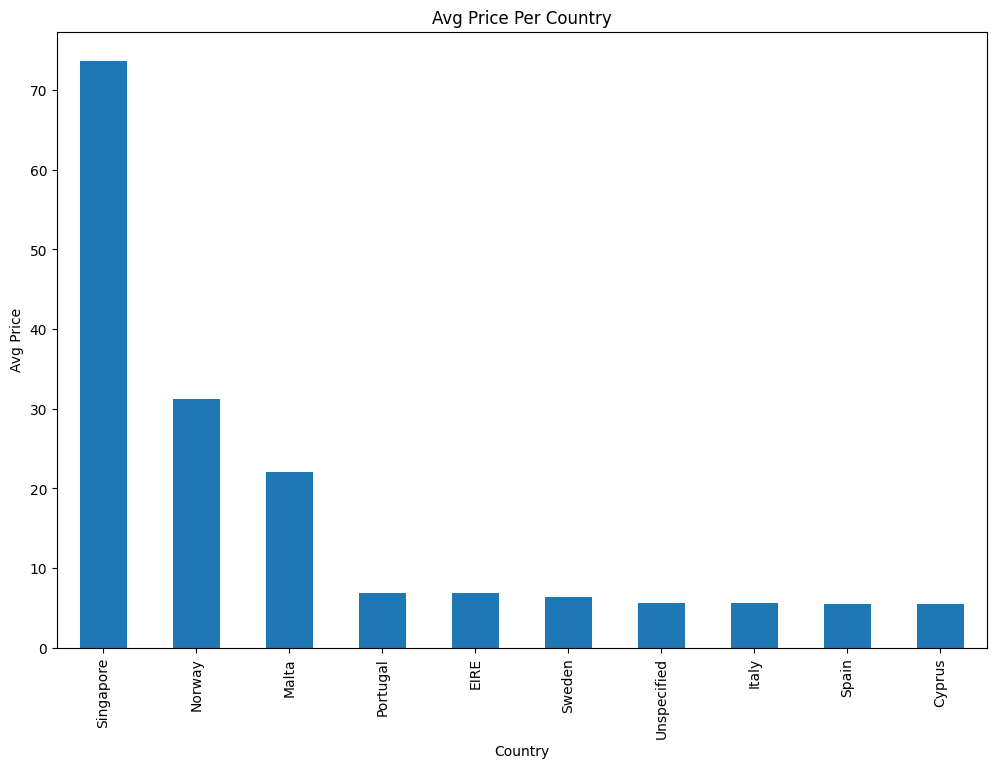

In [58]:
# Build a bar chart
quantity_sum.plot(kind="bar", figsize=(12, 8), title="Avg Price Per Country")
plt.xlabel("Country")
plt.ylabel("Avg Price")
plt.show()

In [76]:

quantity_price_data = clean_df.groupby("Country").agg({
    "Quantity": "sum",
    "Customer ID": "count"
}).rename(columns={
    "Quantity": "Sum Of Quantity",
    "Customer ID": "CNT Customer"
}).sort_values(by="Sum Of Quantity", ascending=True)

quantity_price_data

,Sum Of Quantity,CNT Customer
Country,,
Saudi Arabia,75,10
Nigeria,103,30
Lebanon,386,45
West Indies,395,54
European Community,497,61
Brazil,545,94
Czech Republic,592,30
Korea,598,63
Bahrain,755,59


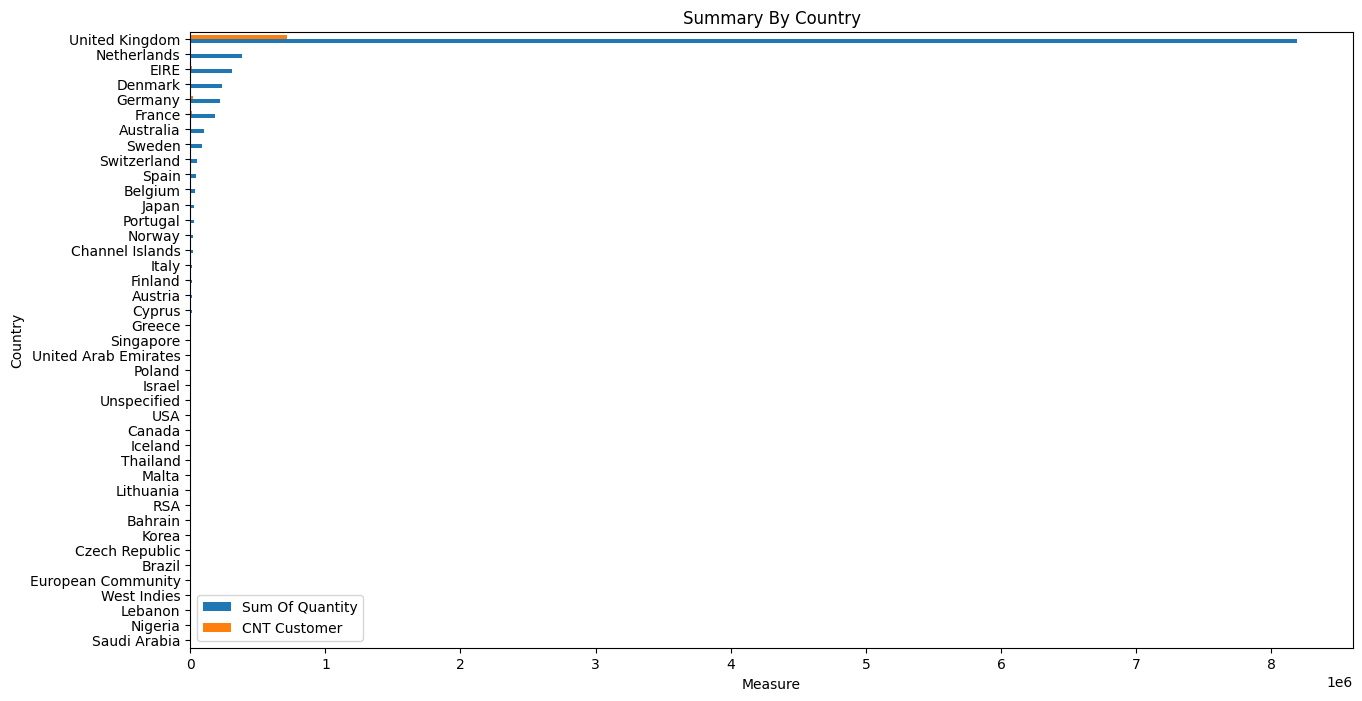

In [77]:
# Plot
quantity_price_data.plot(kind="barh", figsize=(15, 8), title="Summary By Country")
plt.xlabel("Measure")
plt.ylabel("Country")
plt.show()

## Pivot 

In [84]:
# Prepare the data
country_data = clean_df[["Country", "Quantity", "Date", "Price"]]
country_data

,Country,Quantity,Date,Price
0,United Kingdom,12,2009-12-01 07:45:00,6.95
1,United Kingdom,12,2009-12-01 07:45:00,6.75
2,United Kingdom,12,2009-12-01 07:45:00,6.75
3,United Kingdom,48,2009-12-01 07:45:00,2.10
4,United Kingdom,24,2009-12-01 07:45:00,1.25
...,...,...,...,...
797880,France,6,2011-12-09 12:50:00,2.10
797881,France,4,2011-12-09 12:50:00,4.15
797882,France,4,2011-12-09 12:50:00,4.15
797883,France,3,2011-12-09 12:50:00,4.95


In [82]:
# Pivot
country_pivot = pd.pivot_table(country_data, index="Date", columns="Country", values="Quantity", fill_value=0)

country_pivot

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,Singapore,Spain,Sweden,Switzerland,Thailand,USA,United Arab Emirates,United Kingdom,Unspecified,West Indies
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-01 07:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.750000,0.0,0.0
2009-12-01 07:46:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,0.0,0.0
2009-12-01 09:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.157895,0.0,0.0
2009-12-01 09:08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.304348,0.0,0.0
2009-12-01 09:24:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.588235,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09 12:23:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.000000,0.0,0.0
2011-12-09 12:25:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,0.0,0.0
2011-12-09 12:31:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.238095,0.0,0.0


In [92]:
# aggretion function in pivot 
country_pivot2 = pd.pivot_table(
    country_data, 
    index="Date", 
    columns="Country", 
    values=["Quantity", "Price"], 
    fill_value=0, 
    aggfunc={"Quantity":np.sum, "Price": np.mean}
).reset_index()

# Deal with the column name
country_pivot2.columns = country_pivot2.columns.map("_".join)
country_pivot2

,Date_,Price_Australia,Price_Austria,Price_Bahrain,Price_Belgium,Price_Brazil,Price_Canada,Price_Channel Islands,Price_Cyprus,Price_Czech Republic,...,Quantity_Singapore,Quantity_Spain,Quantity_Sweden,Quantity_Switzerland,Quantity_Thailand,Quantity_USA,Quantity_United Arab Emirates,Quantity_United Kingdom,Quantity_Unspecified,Quantity_West Indies
0,2009-12-01 07:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,166,0,0
1,2009-12-01 07:46:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,60,0,0
2,2009-12-01 09:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,193,0,0
3,2009-12-01 09:08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,145,0,0
4,2009-12-01 09:24:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,826,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41434,2011-12-09 12:23:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,76,0,0
41435,2011-12-09 12:25:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,120,0,0
41436,2011-12-09 12:31:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,278,0,0
41437,2011-12-09 12:49:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,66,0,0


In [95]:
# unpivot:melt
unpivot_country = pd.melt(
    country_pivot2,
    id_vars =["Date_"],
    var_name = "Country_Metric",
    value_name = "Value"
)

unpivot_country

,Date_,Country_Metric,Value
0,2009-12-01 07:45:00,Price_Australia,0.0
1,2009-12-01 07:46:00,Price_Australia,0.0
2,2009-12-01 09:06:00,Price_Australia,0.0
3,2009-12-01 09:08:00,Price_Australia,0.0
4,2009-12-01 09:24:00,Price_Australia,0.0
...,...,...,...
3397993,2011-12-09 12:23:00,Quantity_West Indies,0.0
3397994,2011-12-09 12:25:00,Quantity_West Indies,0.0
3397995,2011-12-09 12:31:00,Quantity_West Indies,0.0
3397996,2011-12-09 12:49:00,Quantity_West Indies,0.0


## Join

In [101]:
# Prepare the data
# emp info
employee_df = pd.DataFrame({
    'emp_id': [101, 102, 103, 104, 105],  # 105 无对应部门
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'age': [28, 34, 25, 41, 30]
})

# department info
department_df = pd.DataFrame({
    'emp_id': [101, 102, 103, 106],  # 106 无对应员工
    'depart_id': [1, 2, 1, 4],
    'depart_name': ['HR', 'Engineering', 'HR', 'Finance']
})

#display
# employee_df
department_df

,emp_id,depart_id,depart_name
0,101,1,HR
1,102,2,Engineering
2,103,1,HR
3,106,4,Finance


In [102]:
# inner join
inner_join_data = pd.merge(employee_df, department_df, how="inner", on="emp_id")

inner_join_data

,emp_id,name,age,depart_id,depart_name
0,101,Alice,28,1,HR
1,102,Bob,34,2,Engineering
2,103,Charlie,25,1,HR


In [103]:
# outer join 
outer_join_data = pd.merge(employee_df, department_df, how="outer", on="emp_id")
outer_join_data

,emp_id,name,age,depart_id,depart_name
0,101,Alice,28.0,1.0,HR
1,102,Bob,34.0,2.0,Engineering
2,103,Charlie,25.0,1.0,HR
3,104,Diana,41.0,NaN,NaN
4,105,Eve,30.0,NaN,NaN
5,106,NaN,NaN,4.0,Finance


In [104]:
# left join
left_join_data = pd.merge(employee_df, department_df, how="left", on="emp_id")
left_join_data

,emp_id,name,age,depart_id,depart_name
0,101,Alice,28,1.0,HR
1,102,Bob,34,2.0,Engineering
2,103,Charlie,25,1.0,HR
3,104,Diana,41,NaN,NaN
4,105,Eve,30,NaN,NaN


In [105]:
# right join
right_join_data = pd.merge(employee_df, department_df, how="right", on="emp_id")
right_join_data

,emp_id,name,age,depart_id,depart_name
0,101,Alice,28.0,1,HR
1,102,Bob,34.0,2,Engineering
2,103,Charlie,25.0,1,HR
3,106,NaN,NaN,4,Finance


In [ ]:
# left only join
left_only_data = pd.merge(employee_df, department_df, how="left", on="emp_id", indicator=True)  # will generate extra column "_merge" shows join type

left_only_data = left_only_data[left_only_data['_merge'] == "left_only"].drop(columns=["_merge"])

#Display result
left_only_data


,emp_id,name,age,depart_id,depart_name
3,104,Diana,41,NaN,NaN
4,105,Eve,30,NaN,NaN


In [110]:
# Right only join
right_only_data = pd.merge(employee_df, department_df, how="right", on="emp_id", indicator=True)  # will generate extra column "_merge" shows join type

right_only_data = right_only_data[right_only_data['_merge'] == "right_only"].drop(columns=["_merge"])

#Display result
right_only_data

,emp_id,name,age,depart_id,depart_name
3,106,NaN,NaN,4,Finance
